In [136]:
##-----Library Imports------##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns

In [137]:
##-----STEP ONE: Import Data-----##

data_path = "1-Cleaned Data.csv"
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
df.head(10)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,Ward 57,7700,ZA,South Africa,-33.94739,18.47600,1,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,0.0,5.0,1.0,0.0,Ward 115,8051,ZA,South Africa,-33.90771,18.40535,1,Bed and breakfast,Hotel room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Breakfast,""Free st...",2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0,5,0,0,0,0.020000,7.652071,0,1,0,0,0
2,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 6 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",Please note we do not provide beach towels at ...,We're located about 25 minutes drive out on th...,Guests have access to the full self-catering h...,"Ingrid, our booking manager, will meet you and...",Please ensure that arrangements are made for y...,2009-12-01,Proud to live in the beautiful city of Cape To...,within an hour,100%,1.0,12.0,1.0,1.0,Ward 23,7441,ZA,South Africa,-33.80114,18.46180,1,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",2048.0,2500.000000,850.000000,6,250.0,2,120,2,2,120,120,2.0,120.0,1,0,2,32,293,2

In [138]:
##----STEP TWO: Categorical Data with Less than Ten Categories----##

#room type
dummy_variable_1=pd.get_dummies(df["room_type"])
dummy_variable_1.rename(columns={'Entire home/apt':'entire', "Hotel room":'hotel', 'Private room':'private', 'Shared room':'shared'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

In [139]:
#host response time
dummy_variable_1=pd.get_dummies(df["host_response_time"])
df = pd.concat([df, dummy_variable_1], axis=1)

In [140]:
#cancellation policy
dummy_variable_1=pd.get_dummies(df["cancellation_policy"])
df = pd.concat([df, dummy_variable_1], axis=1)

In [141]:
##----STEP THREE: Categorical Data with More than Ten Categories----##

#neighbourhood must retain its ward number
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype('str')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.replace('Ward ', '')
df[["neighbourhood_cleansed"]] = df[["neighbourhood_cleansed"]].astype("float")

In [142]:
##----Zipcode----##
#Identify invalid row
invalid = df[df['zipcode']=='7789\n7780'].index.values
print(invalid)

[7907]


In [143]:
#Drop invalid rows
df.drop(df.index[invalid], inplace = True) #invalid row - zipcode invalid
# reset index, because we dropped rows
df.reset_index(drop=True, inplace=True)

In [144]:
#Change data type
df['zipcode'] = df['zipcode'].astype('float')
df["log_price"].corr(df["zipcode"]) 

0.10611852733927257

In [145]:
#Ordinal encoding
#Improves if you put into categories
df['zipcode'] = df['zipcode'].astype('category')
df['zipcode'] = df['zipcode'].cat.codes
df["log_price"].corr(df["zipcode"]) 

0.13307098495993264

In [146]:
##----Property Type----##
df['property_type'] = df['property_type'].astype('category')
df['property_type'] = df['property_type'].cat.codes
df["log_price"].corr(df["property_type"]) 

0.25091342350513973

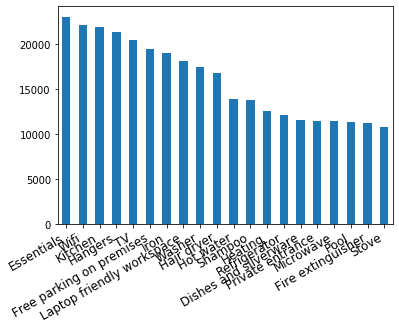

In [147]:
##----Amenities----##
df.amenities = df.amenities.str.replace("[{}]", "").str.replace('"', "")
pd.Series(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)
plt.show();

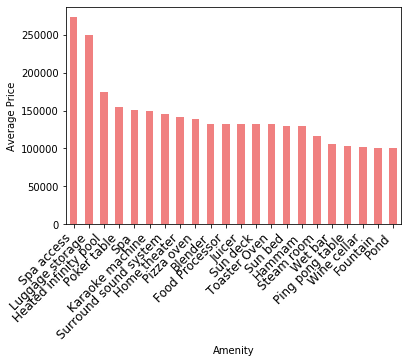

In [148]:
##----Amenities vs Average Price [Higher Bracket]----##
amenities = np.unique(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[:22].plot(kind='bar', color = '#F08080')
ax = plt.gca()
plt.ylabel("Average Price")
plt.xlabel("Amenity")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.savefig("Amenities_Average_Price_Top_2.png", dpi=300, bbox_inches='tight')
plt.show()

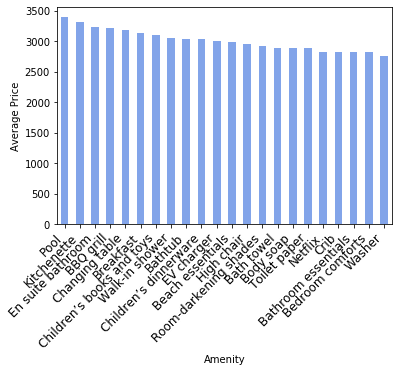

In [149]:
##----Amenities vs Average Price [Lower Bracket]----##
amenities = np.unique(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, df[df['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[150:172].plot(kind='bar',  color = "#82A4E9") #82A4E9 ##84AEFF
ax = plt.gca()
plt.ylabel("Average Price")
plt.xlabel("Amenity")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.savefig("Amenities_Average_Price_Middle_2.png", dpi=300, bbox_inches='tight')
plt.show()

In [150]:
##----Calculation of Amenities Score----##
sorted_amenities = amenity_srs.sort_values(ascending=False)
print(sorted_amenities.shape)
max_price_av = sorted_amenities[0]
mid_price_av = sorted_amenities[143]

#assign each a value (score) based on relative average price
#for each entry - add up score for which amenities are present
amenities_dict = {}
for x in sorted_amenities.index:
    #print(x)
    proportional_val = ((sorted_amenities.at[x])/mid_price_av)*100
    #proportional_val = sorted_amenities.at[x]
    #print(proportional_val)
    amenities_dict[x] = proportional_val
    
amenity_scores = []
print(df["amenities"].shape)
print(df["amenities"].loc[[522]])
for y in df["amenities"]:
    #print(y)
    amenity_sum = 0
    amns = y.split(",")
    for z in amns:
        #print(z)
        if(z!=""):
            amenity_sum = amenity_sum + amenities_dict[z]
    amenity_scores.append(amenity_sum)

    
df["amenity_scores"] = amenity_scores
df["log_price"].corr(df["amenity_scores"]) 

(286,)
(24451,)
522    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
Name: amenities, dtype: object


0.30902903941304416

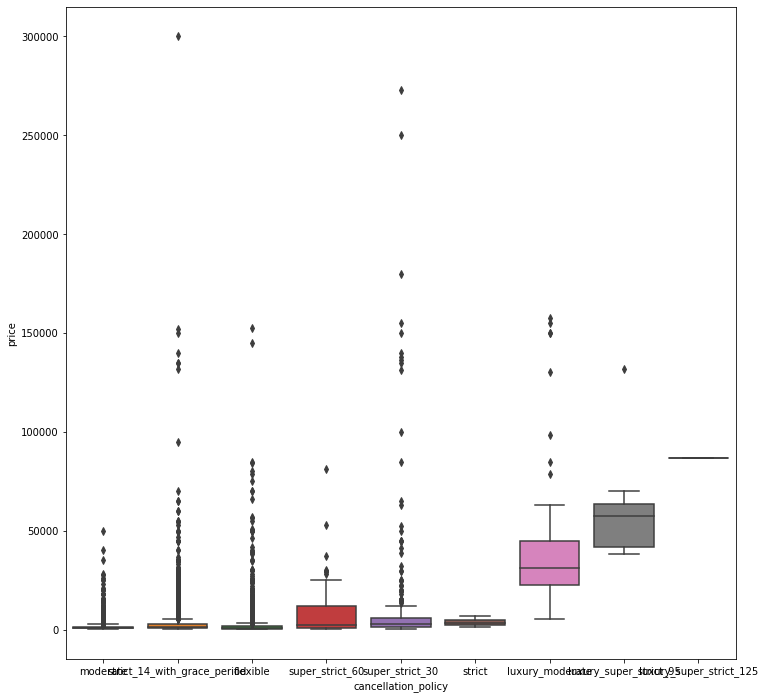

In [151]:
##----STEP FIVE: Exploratory Data Analysis----##
#boxplot of cancellation policy
f, ax = plt.subplots(figsize= (12, 12))
sns.boxplot(x="cancellation_policy", y="price", data=df)

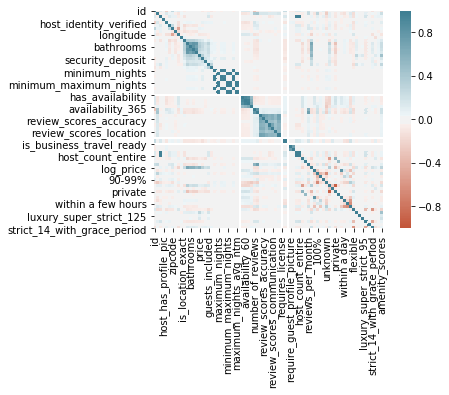

In [152]:
##----Correlation Heatmap----##
cont_corr = df.corr()
ax = sns.heatmap(
    cont_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [153]:
##----Extract numerical columns only----##
num_columns = []
for column in df:
    if((df[column].dtype!=object)&(df[column].dtype!=str)):
        num_columns.append(column)
print(num_columns)
print(len(num_columns))
features = df[num_columns]

['id', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_ho

In [154]:
##----Place Target Variable at Front----##
log = features["log_price"]
features = features.drop("log_price", axis = 1)
features.insert(0, 'log_price', log)
features.head()

,log_price,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores
0,6.493754,3191,1.0,1.0,1.0,1.0,57.0,62,-33.94739,18.47600,1,21,2,1.0,1.0,1.0,661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,0,0,1,1,0,0,0.610000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320
1,7.652071,13044,0.0,5.0,1.0,0.0,115.0,125,-33.90771,18.40535,1,3,2,1.0,1.0,1.0,2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,0,0,5,0,0,0,0.020000,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779
2,7.624619,15007,1.0,12.0,1.0,1.0,23.0,31,-33.80114,18.46180,1,25,6,3.0,3.0,4.0,2048.0,2500.000000,850.000000,6,250.0,2,120,2,2,120,120,2.0,120.0,1,0,2,32,293,27,2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,0,0,2,2,0,0,0.370000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3612.146587
3,7.198184,15077,0.0,5.0,1.0,1.0,4.0,31,-33.85878,18.48970,1,1,2,1.5,1.0,2.0,1337.0,2656.082216,322.727352,2,0.0,5,1125,5,5,1125,1125,5.0,1125.0,1,12,22,52,327,5,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,0,0,5,1,4,0,0.060000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3260.343187
4,6.329721,15180,0.0,1.0,0.0,0.0,83.0,16,-34.11124,18.82349,1,1,2,1.0,1.0,1.0,561.0,2656.082216,150.000000,2,100.0,2,730,2,2,730,730,2.0,730.0,1,26,56,86,361,0,0,94.834741,9.656356,9.572654,9.762728,9.769081,9.719734,9.537054,0,0,0,0,0,1,1,0,0,0.919543,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,512.116431


In [155]:
features.to_csv("2-Feature Engineering - Continuous and Categorical.csv", index=False) #save continuous and categorical data


In [156]:
##----Extract Textual Features----##
textual = df[['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about']]


In [157]:
textual.to_csv("2-Feature Engineering - Textual.csv", index=False) #save textual features to file

In [158]:
df.to_csv("2-Feature Engineering - All Present.csv", index=False) #save all features to csv